<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/PromRob_freeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Постановка задачи

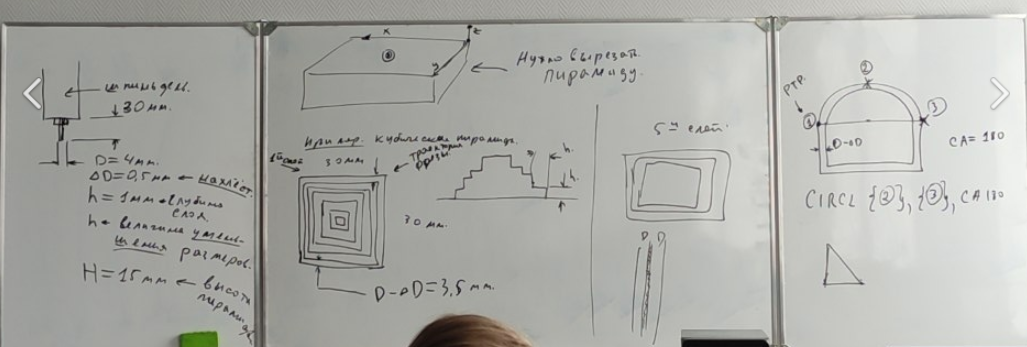

Анализ решения

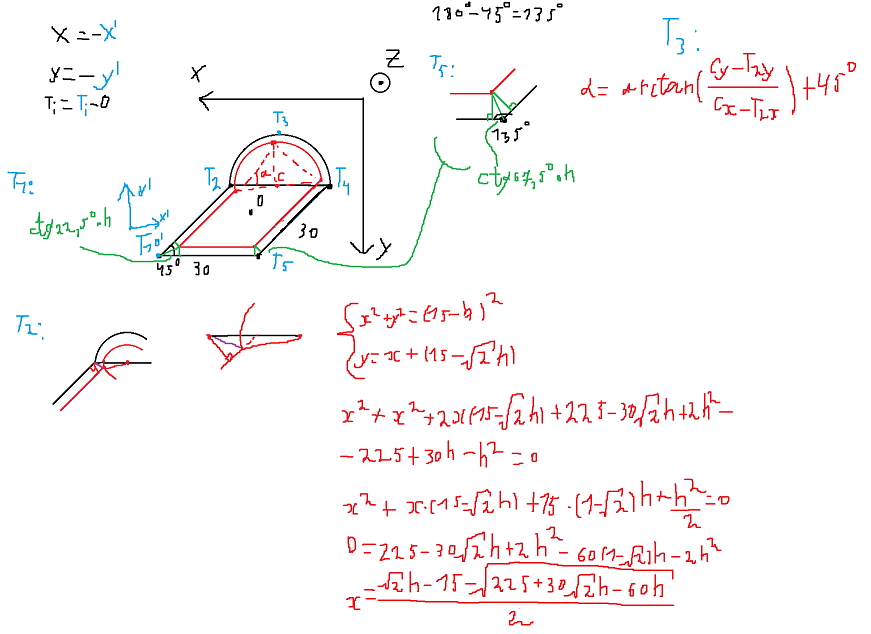

Формирование точек

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
h_in = 1
H_in = 1
n_steps = 11

degree = np.pi/180
eps = 10**(-9)

In [105]:
T1_fun = lambda h, H: [h/np.tan(22.5*degree), h, H]
T2_fun = lambda h, H: [30/np.sqrt(2) + 15 + (np.sqrt(2)*h - 15 - np.sqrt(225 + 30*np.sqrt(2)*h - 60*h))/2, 
                    30/np.sqrt(2) + (15 - np.sqrt(2)*h - np.sqrt(225 + 30*np.sqrt(2)*h - 60*h))/2, H]
T3_fun = lambda h, H: [T2_fun(h, H)[0] + np.cos(np.arctan((30/np.sqrt(2) - T2_fun(h, H)[1])/(30/np.sqrt(2) + 15 - T2_fun(h, H)[0])) + 45*degree)*np.sqrt(2)*(15 - h), 
                    T2_fun(h, H)[1] + np.sin(np.arctan((30/np.sqrt(2) - T2_fun(h, H)[1])/(30/np.sqrt(2) + 15 - T2_fun(h, H)[0])) + 45*degree)*np.sqrt(2)*(15 - h), H]
T4_fun = lambda h, H: [T2_fun(h, H)[0] + 2*(30/np.sqrt(2) + 15 - T2_fun(h, H)[0]), 
                    T2_fun(h, H)[1] + 2*(30/np.sqrt(2) - T2_fun(h, H)[1]), H]
T5_fun = lambda h, H: [30 - h/np.tan(67.5*degree), h, H]

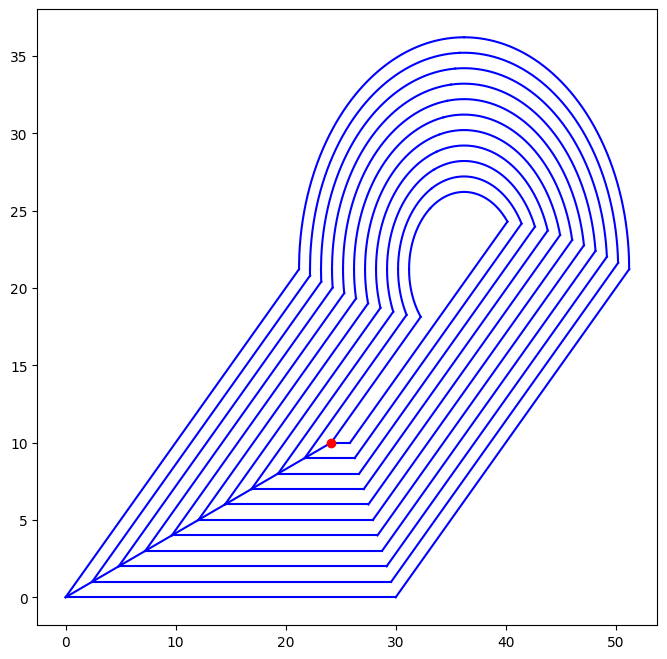

In [106]:
fig = plt.figure(figsize=(8, 8))
T1_list = []
T2_list = []
T3_list = []
T4_list = []
T5_list = []
for h, H in zip(range(n_steps), range(n_steps)):
  h *= h_in
  H *= H_in
  T1 = T1_fun(h, H)
  T2 = T2_fun(h, H)
  T3 = T3_fun(h, H)
  T4 = T4_fun(h, H)
  T5 = T5_fun(h, H)
  T1_list.append(T1)
  T2_list.append(T2)
  T3_list.append(T3)
  T4_list.append(T4)
  T5_list.append(T5)
  plt.plot([T1[0], T2[0]], [T1[1], T2[1]], color='b')
  #plt.plot([T2[0], T3[0]], [T2[1], T3[1]], color='b')
  #plt.plot([T3[0], T4[0]], [T3[1], T4[1]], color='b')
  circl1_x = [30/np.sqrt(2) + h + k*(T2[0] - 30/np.sqrt(2) - h)/1000 for k in range(1001)]
  circl1_y = [30/np.sqrt(2) - np.sqrt((15 - h)**2 - (x - 30/np.sqrt(2) - 15)**2 + eps) for x in circl1_x]
  plt.plot(circl1_x, circl1_y, color='b')
  circl2_x = [30/np.sqrt(2) + h + k*(T3[0] - 30/np.sqrt(2) - h)/1000 for k in range(1001)]
  circl2_y = [30/np.sqrt(2) + np.sqrt((15 - h)**2 - (x - 30/np.sqrt(2) - 15)**2 + eps) for x in circl2_x]
  plt.plot(circl2_x, circl2_y, color='b')
  circl3_x = [T3[0] + k*(T4[0] - T3[0])/1000 for k in range(1001)]
  circl3_y = [30/np.sqrt(2) + np.sqrt((15 - h)**2 - (x - 30/np.sqrt(2) - 15)**2 + eps) for x in circl3_x]
  plt.plot(circl3_x, circl3_y, color='b')
  plt.plot([T4[0], T5[0]], [T4[1], T5[1]], color='b')
  plt.plot([T5[0], T1[0]], [T5[1], T1[1]], color='b')
  if h/h_in < (n_steps - 1):
    plt.plot([T1[0], T1_fun(h + h_in, H + H_in)[0]], [T1[1], T1_fun(h + h_in, H + H_in)[1]], color='b')
plt.plot(T1[0], T1[1], 'ro')
plt.show()

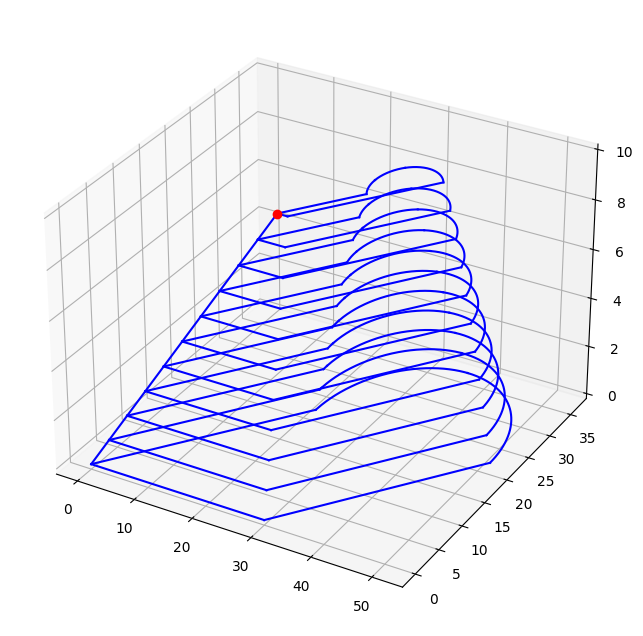

In [107]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
for i in range(n_steps):
  h = h_in*i
  H = H_in*i
  T1 = T1_list[i]
  T2 = T2_list[i]
  T3 = T3_list[i]
  T4 = T4_list[i]
  T5 = T5_list[i]
  ax.plot([T1[0], T2[0]], [T1[1], T2[1]], [T1[2], T2[2]], color='b')
  #plt.plot([T2[0], T3[0]], [T2[1], T3[1]], color='b')
  #plt.plot([T3[0], T4[0]], [T3[1], T4[1]], color='b')
  circl1_x = [30/np.sqrt(2) + h + k*(T2[0] - 30/np.sqrt(2) - h)/1000 for k in range(1001)]
  circl1_y = [30/np.sqrt(2) - np.sqrt((15 - h)**2 - (x - 30/np.sqrt(2) - 15)**2 + eps) for x in circl1_x]
  circl1_z = [T1[2]]*1001
  ax.plot(circl1_x, circl1_y, circl1_z, color='b')
  circl2_x = [30/np.sqrt(2) + h + k*(T3[0] - 30/np.sqrt(2) - h)/1000 for k in range(1001)]
  circl2_y = [30/np.sqrt(2) + np.sqrt((15 - h)**2 - (x - 30/np.sqrt(2) - 15)**2 + eps) for x in circl2_x]
  circl2_z = [T1[2]]*1001
  ax.plot(circl2_x, circl2_y, circl2_z, color='b')
  circl3_x = [T3[0] + k*(T4[0] - T3[0])/1000 for k in range(1001)]
  circl3_y = [30/np.sqrt(2) + np.sqrt((15 - h)**2 - (x - 30/np.sqrt(2) - 15)**2 + eps) for x in circl3_x]
  circl3_z = [T1[2]]*1001
  ax.plot(circl3_x, circl3_y, circl3_z, color='b')
  ax.plot([T4[0], T5[0]], [T4[1], T5[1]], [T4[2], T5[2]], color='b')
  ax.plot([T5[0], T1[0]], [T5[1], T1[1]], [T5[2], T1[2]], color='b')
  if i < (n_steps - 1):
    plt.plot([T1[0], T1_fun(h + h_in, H + H_in)[0]], [T1[1], T1_fun(h + h_in, H + H_in)[1]], [T1[2], T1_fun(h + h_in, H + H_in)[2]], color='b')
ax.plot(T1[0], T1[1], T1[2], 'ro')
plt.show()

Приводим к заданой системе координат

In [108]:
start_point = [T1_list[-1][0], T1_list[-1][1], T1_list[-1][2] + H_in]
T1_list = np.array(T1_list) - start_point
T2_list = np.array(T2_list) - start_point
T3_list = np.array(T3_list) - start_point
T4_list = np.array(T4_list) - start_point
T5_list = np.array(T5_list) - start_point

T1_list = T1_list[::-1]
T2_list = T2_list[::-1]
T3_list = T3_list[::-1]
T4_list = T4_list[::-1]
T5_list = T5_list[::-1]

T1_list = [[T1_list[i, 0], -T1_list[i, 2], T1_list[i, 1]] for i in range(n_steps)]
T2_list = [[T2_list[i, 0], -T2_list[i, 2], T2_list[i, 1]] for i in range(n_steps)]
T3_list = [[T3_list[i, 0], -T3_list[i, 2], T3_list[i, 1]] for i in range(n_steps)]
T4_list = [[T4_list[i, 0], -T4_list[i, 2], T4_list[i, 1]] for i in range(n_steps)]
T5_list = [[T5_list[i, 0], -T5_list[i, 2], T5_list[i, 1]] for i in range(n_steps)]

Формирвуем основной блок файла

In [109]:
n_round = 5
with open('/content/freez.txt', 'w') as f:
  data = "DEF freez()\n"
  data += "INI\n"
  data += "PTP HOME\n"
  for i in range(n_steps):
    data += f"LIN {{X {T1_list[i][0]:.{n_round}f}, Y {T1_list[i][1] - H_in:.{n_round}f}, Z {T1_list[i][2]:.{n_round}f}}}\n"
    data += f"LIN {{X {T1_list[i][0]:.{n_round}f}, Y {T1_list[i][1]:.{n_round}f}, Z {T1_list[i][2]:.{n_round}f}}}\n"
    data += f"LIN {{X {T2_list[i][0]:.{n_round}f}, Y {T2_list[i][1]:.{n_round}f}, Z {T2_list[i][2]:.{n_round}f}}}\n"
    data += (f"CIRC {{X {T3_list[i][0]:.{n_round}f}, Y {T3_list[i][1]:.{n_round}f}, Z {T3_list[i][2]:.{n_round}f}}}, "
             f"{{X {T4_list[i][0]:.{n_round}f}, Y {T4_list[i][1]:.{n_round}f}, Z {T4_list[i][2]:.{n_round}f}}}, CA 180\n")
    data += f"LIN {{X {T5_list[i][0]:.{n_round}f}, Y {T5_list[i][1]:.{n_round}f}, Z {T5_list[i][2]:.{n_round}f}}}\n"
    data += f"LIN {{X {T1_list[i][0]:.{n_round}f}, Y {T1_list[i][1]:.{n_round}f}, Z {T1_list[i][2]:.{n_round}f}}}\n"
  data += "END\n"
  f.write(data)